In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pylab
import scipy.stats as st
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

%matplotlib inline

data = pd.read_csv("data/IndexE8.csv")
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [2]:
data['date'] = pd.to_datetime(data.date, dayfirst=True)
data.set_index('date', inplace=True)
data.index.name = None
data = data.asfreq('b').fillna(method='ffill')

In [3]:
def llr_test(model_1, model_2, DF=1):
    l1 = model_1.fit().llf
    l2 = model_2.fit().llf
    lr = 2 * (l2 - l1)
    p = chi2.sf(lr, DF)
    return p

In [4]:
data['returns'] = data.ftse.pct_change(1) * 100

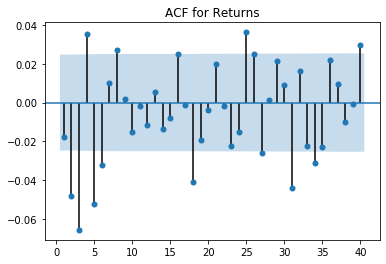

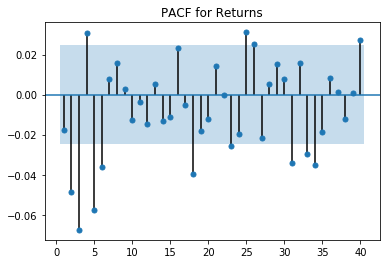

In [5]:
sgt.plot_acf(data.returns[1:], zero=False, lags=40)
plt.title('ACF for Returns');

sgt.plot_pacf(data.returns[1:], zero=False, lags=40, method=('ols'))
plt.title('PACF for Returns');

## **MA(1) for Returns**

In [6]:
model_ret_ar_1 = ARMA(data.returns[1:], order=(0, 1))
result_ret_ar_1 = model_ret_ar_1.fit()
print(result_ret_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 1)   Log Likelihood               -9597.598
Method:                       css-mle   S.D. of innovations              1.117
Date:                Sun, 10 May 2020   AIC                          19201.195
Time:                        17:47:26   BIC                          19221.429
Sample:                    01-10-1994   HQIC                         19208.206
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.374      0.169      -0.008       0.046
ma.L1.returns    -0.0196      0.013     -1.467      0.142      -0.046       0.007
                                    Root

## **Higher-Lag MA models for Returns**

In [7]:
model_ret_ar_2 = ARMA(data.returns[1:], order=(0, 2))
result_ret_ar_2 = model_ret_ar_2.fit()
print(result_ret_ar_2.summary())
print(f"\nLLR test p-value = {llr_test(model_ret_ar_1, model_ret_ar_2)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 2)   Log Likelihood               -9589.839
Method:                       css-mle   S.D. of innovations              1.115
Date:                Sun, 10 May 2020   AIC                          19187.677
Time:                        17:47:27   BIC                          19214.655
Sample:                    01-10-1994   HQIC                         19197.025
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.457      0.145      -0.007       0.045
ma.L1.returns    -0.0254      0.013     -2.000      0.045      -0.050      -0.001
ma.L2.returns    -0.0488      0.012     

In [8]:
model_ret_ar_3 = ARMA(data.returns[1:], order=(0, 3))
result_ret_ar_3 = model_ret_ar_3.fit()
print(result_ret_ar_3.summary())
print(f"\nLLR test p-value = {llr_test(model_ret_ar_2, model_ret_ar_3)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 3)   Log Likelihood               -9573.494
Method:                       css-mle   S.D. of innovations              1.112
Date:                Sun, 10 May 2020   AIC                          19156.988
Time:                        17:47:27   BIC                          19190.710
Sample:                    01-10-1994   HQIC                         19168.672
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.587      0.113      -0.004       0.043
ma.L1.returns    -0.0175      0.013     -1.381      0.167      -0.042       0.007
ma.L2.returns    -0.0539      0.012     

In [9]:
model_ret_ar_4 = ARMA(data.returns[1:], order=(0, 4))
result_ret_ar_4 = model_ret_ar_4.fit()
print(result_ret_ar_4.summary())
print(f"\nLLR test p-value = {llr_test(model_ret_ar_3, model_ret_ar_4)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 4)   Log Likelihood               -9570.420
Method:                       css-mle   S.D. of innovations              1.112
Date:                Sun, 10 May 2020   AIC                          19152.840
Time:                        17:47:30   BIC                          19193.307
Sample:                    01-10-1994   HQIC                         19166.861
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.533      0.125      -0.005       0.043
ma.L1.returns    -0.0169      0.013     -1.342      0.180      -0.042       0.008
ma.L2.returns    -0.0540      0.013     

In [10]:
model_ret_ar_5 = ARMA(data.returns[1:], order=(0, 5))
result_ret_ar_5 = model_ret_ar_5.fit()
print(result_ret_ar_5.summary())
print(f"\nLLR test p-value = {llr_test(model_ret_ar_4, model_ret_ar_5)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 5)   Log Likelihood               -9562.650
Method:                       css-mle   S.D. of innovations              1.110
Date:                Sun, 10 May 2020   AIC                          19139.300
Time:                        17:47:34   BIC                          19186.511
Sample:                    01-10-1994   HQIC                         19155.658
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.617      0.106      -0.004       0.042
ma.L1.returns    -0.0214      0.013     -1.691      0.091      -0.046       0.003
ma.L2.returns    -0.0494      0.013     

In [11]:
model_ret_ar_6 = ARMA(data.returns[1:], order=(0, 6))
result_ret_ar_6 = model_ret_ar_6.fit()
print(result_ret_ar_6.summary())
print(f"\nLLR test p-value = {llr_test(model_ret_ar_5, model_ret_ar_6)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 6)   Log Likelihood               -9559.890
Method:                       css-mle   S.D. of innovations              1.110
Date:                Sun, 10 May 2020   AIC                          19135.779
Time:                        17:47:40   BIC                          19189.735
Sample:                    01-10-1994   HQIC                         19154.474
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.668      0.095      -0.003       0.041
ma.L1.returns    -0.0194      0.013     -1.542      0.123      -0.044       0.005
ma.L2.returns    -0.0487      0.013     

In [12]:
model_ret_ar_7 = ARMA(data.returns[1:], order=(0, 7))
result_ret_ar_7 = model_ret_ar_7.fit()
print(result_ret_ar_7.summary())
print(f"\nLLR test p-value = {llr_test(model_ret_ar_6, model_ret_ar_7)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 7)   Log Likelihood               -9559.715
Method:                       css-mle   S.D. of innovations              1.110
Date:                Sun, 10 May 2020   AIC                          19137.430
Time:                        17:47:50   BIC                          19198.130
Sample:                    01-10-1994   HQIC                         19158.461
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.655      0.098      -0.004       0.042
ma.L1.returns    -0.0201      0.013     -1.586      0.113      -0.045       0.005
ma.L2.returns    -0.0490      0.013     

In [13]:
model_ret_ar_8 = ARMA(data.returns[1:], order=(0, 8))
result_ret_ar_8 = model_ret_ar_8.fit()
print(result_ret_ar_8.summary())
print(f"\nLLR test p-value = {llr_test(model_ret_ar_7, model_ret_ar_8)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood               -9557.611
Method:                       css-mle   S.D. of innovations              1.110
Date:                Sun, 10 May 2020   AIC                          19135.223
Time:                        17:48:05   BIC                          19202.668
Sample:                    01-10-1994   HQIC                         19158.591
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.609      0.108      -0.004       0.042
ma.L1.returns    -0.0197      0.013     -1.564      0.118      -0.044       0.005
ma.L2.returns    -0.0491      0.013     

In [14]:
print(f"\nLLR test p-value = {llr_test(model_ret_ar_6, model_ret_ar_8, DF=2)}")


LLR test p-value = 0.10247279189799564


## **Residuals for Returns**

In [15]:
data['res_ret_ma_8'] = result_ret_ar_8.resid[1:]

print(f"Residual mean: {data.res_ret_ma_8.mean():.3f}")
print(f"Residual variance: {data.res_ret_ma_8.var():.3f}, Square Root: {np.sqrt(data.res_ret_ma_8.var()):.3f}")

Residual mean: -0.000
Residual variance: 1.231, Square Root: 1.110


Text(0.5, 1.0, 'Residuals Of returns')

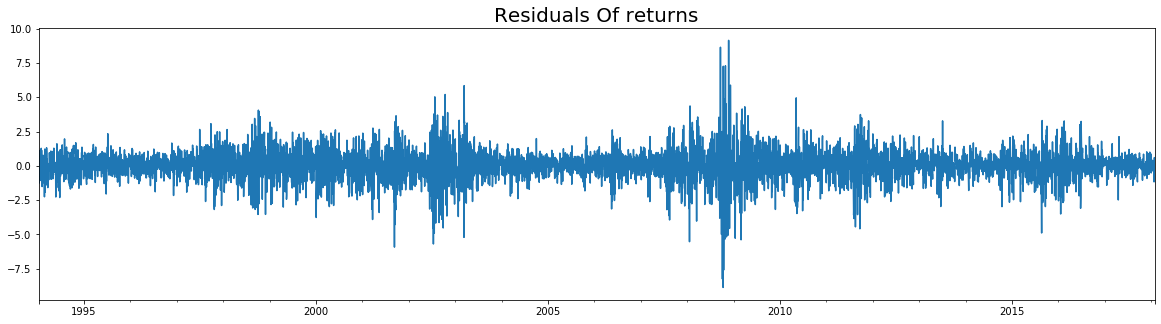

In [16]:
data.res_ret_ma_8[1:].plot(figsize=(20, 5))
plt.title('Residuals Of returns', size=20)

In [17]:
print(f"Dickey-Fuller Test:\n{sts.adfuller(data.res_ret_ma_8[2:])}")

Dickey-Fuller Test:
(-79.2064580979909, 0.0, 0, 6274, {'1%': -3.4313927123850956, '5%': -2.8620007867175294, '10%': -2.5670152737839897}, 19024.102543886875)


Text(0.5, 1.0, 'ACF of Residual For Prices')

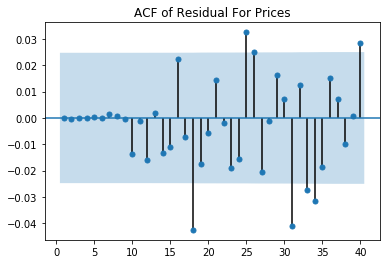

In [18]:
sgt.plot_acf(data.res_ret_ma_8[2:], zero=False, lags=40)
plt.title('ACF of Residual For Prices')

## **Normalizing the Returns**

In [27]:
benchmark = data.returns.iloc[1]
data['norm_ret'] = data.returns / benchmark * 100
data.norm_ret.head()

1994-01-07           NaN
1994-01-10    100.000000
1994-01-11    497.260711
1994-01-12    780.443046
1994-01-13    227.285567
Freq: B, Name: norm_ret, dtype: float64

Text(0.5, 1.0, 'ACF for Normalized Returns')

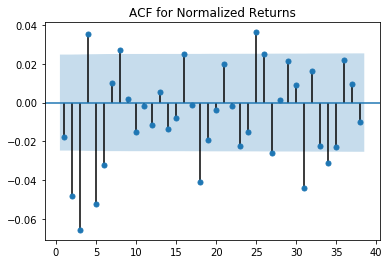

In [35]:
sgt.plot_acf(data.norm_ret[1:], zero=False)
plt.title('ACF for Normalized Returns')

Text(0.5, 1.0, 'Normalized Returns')

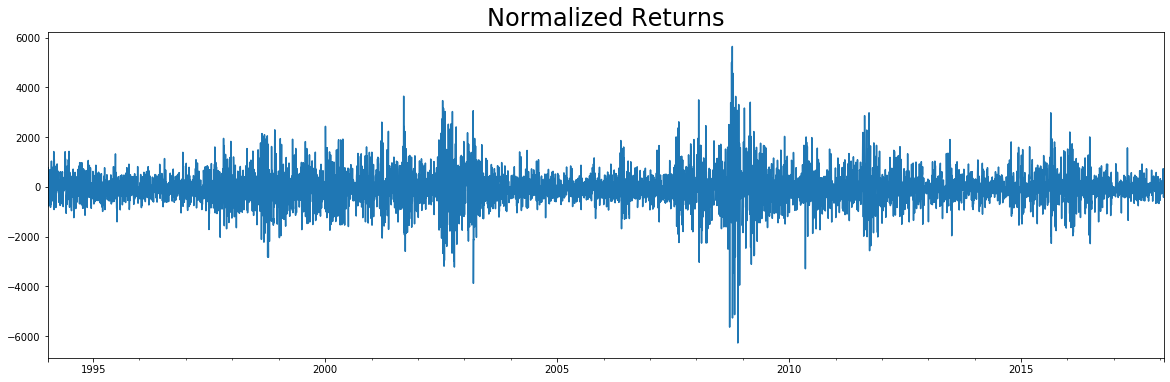

In [30]:
data.norm_ret.plot(figsize=(20,6))
plt.title('Normalized Returns', size=24)

In [36]:
model_norm_ret_ma_8 = ARMA(data.norm_ret[1:], order=(0, 8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
print(results_norm_ret_ma_8.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood              -50091.563
Method:                       css-mle   S.D. of innovations            708.043
Date:                Sun, 10 May 2020   AIC                         100203.127
Time:                        17:56:50   BIC                         100270.571
Sample:                    01-10-1994   HQIC                        100226.495
                         - 01-29-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.1199      7.547     -1.606      0.108     -26.911       2.672
ma.L1.norm_ret    -0.0197      0.013     -1.563      0.118      -0.044       0.005
ma.L2.norm_ret    -0.0491      0.013

## **MA Models For Prices**

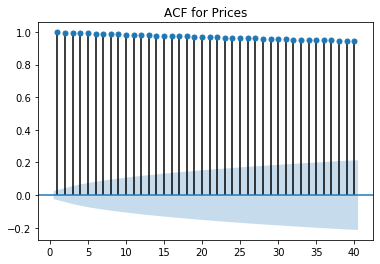

In [37]:
sgt.plot_acf(data.ftse, zero=False, lags=40)
plt.title('ACF for Prices');

In [38]:
model_ma_1 = ARMA(data.ftse, order=(0, 1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(0, 1)   Log Likelihood              -48997.927
Method:                       css-mle   S.D. of innovations            593.951
Date:                Sun, 10 May 2020   AIC                          98001.855
Time:                        18:01:23   BIC                          98022.089
Sample:                    01-07-1994   HQIC                         98008.866
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.7582     14.722    368.414      0.000    5394.904    5452.613
ma.L1.ftse     0.9639      0.002    411.574      0.000       0.959       0.969
                                    Roots           